# Learning Laminitus in Horse Hooves

---

### Our Variables

* Healthiness of each horse (binary)
  * $1$: is Laminitic
  * $0$: is Healthy

* Which foot of the horse the experiment was conducted on
  * All data, as of now, has been collected using the front, right hooves of each horse

* Type of horse shoe 
  * $1$: Standard
  * $2$: HeartBar
  * $3$: EggBar
  * $4$: Unshod

---

### Our Goal

* Use DW, SM, and CB coordinates with respect to time, in combination, to predict the displacement of P3.
  * Coordinates $∈ \R^3$

---

If an error occurs upon accessing the directory with all of the data concerning *.DS_store*:

1. Navigate to the directory using `cd` in the terminal.

2. Copy and paste:

```go
find . -name '.DS_Store' -type f -delete
```

---

## 1. Check if Tensorflow is configured to use the GPU

(Empty brackets indicate it is not configured to use the GPU)

In [15]:
import tensorflow as tf

tf.config.list_physical_devices('GPU') # pip install/uninstall tensorflow-metal (Mac M1 only)

[]

## 2. Acquire All Data

In [16]:
from utility import *

df = acquire_all_data()
df

,Trial,Time,DW_x,DW_y,DW_z,SM_x,SM_y,SM_z,CB_x,CB_y,CB_z,P3_x,P3_y,P3_z,isLaminitic,Shoe
0,1,0.000,230.016000,1288.376000,80.285000,168.875000,1242.841000,74.780000,178.361000,1286.174000,55.349000,166.101000,1266.179000,71.436000,0,4
1,1,0.005,229.958000,1291.542000,80.775000,168.840500,1246.085000,75.432000,178.363500,1289.255000,56.218000,165.987500,1268.869000,72.456000,0,4
2,1,0.010,230.065500,1291.542000,80.775000,168.907750,1246.085000,75.432000,178.357250,1289.255000,56.218000,165.997750,1268.869000,72.456000,0,4
3,1,0.015,230.063250,1291.542000,80.775000,168.905375,1246.085000,75.432000,178.372125,1289.255000,56.218000,166.000375,1268.869000,72.456000,0,4
4,1,0.020,230.103125,1291.542000,80.775000,168.908187,1246.085000,75.432000,178.338562,1289.255000,56.218000,165.993687,1268.869000,72.456000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,204,23.180,299.208124,1308.797408,89.272757,230.511158,1255.943654,77.659034,232.156780,1275.652129,69.131509,241.113047,1306.050174,51.590709,1,1
4637,204,23.185,299.110062,1308.797408,89.272757,230.512772,1255.943654,77.659034,232.263390,1275.652129,69.131509,241.225024,1306.050174,51.590709,1,1
4638,204,23.190,299.158031,1308.797408,89.272757,230.514386,1255.943654,77.659034,232.223195,1275.652129,69.131509,241.188012,1306.050174,51.590709,1,1
4639,204,23.195,299.234016,1308.797408,89.272757,230.661193,1255.943654,77.659034,232.162598,1275.652129,69.131509,241.232506,1306.050174,51.590709,1,1


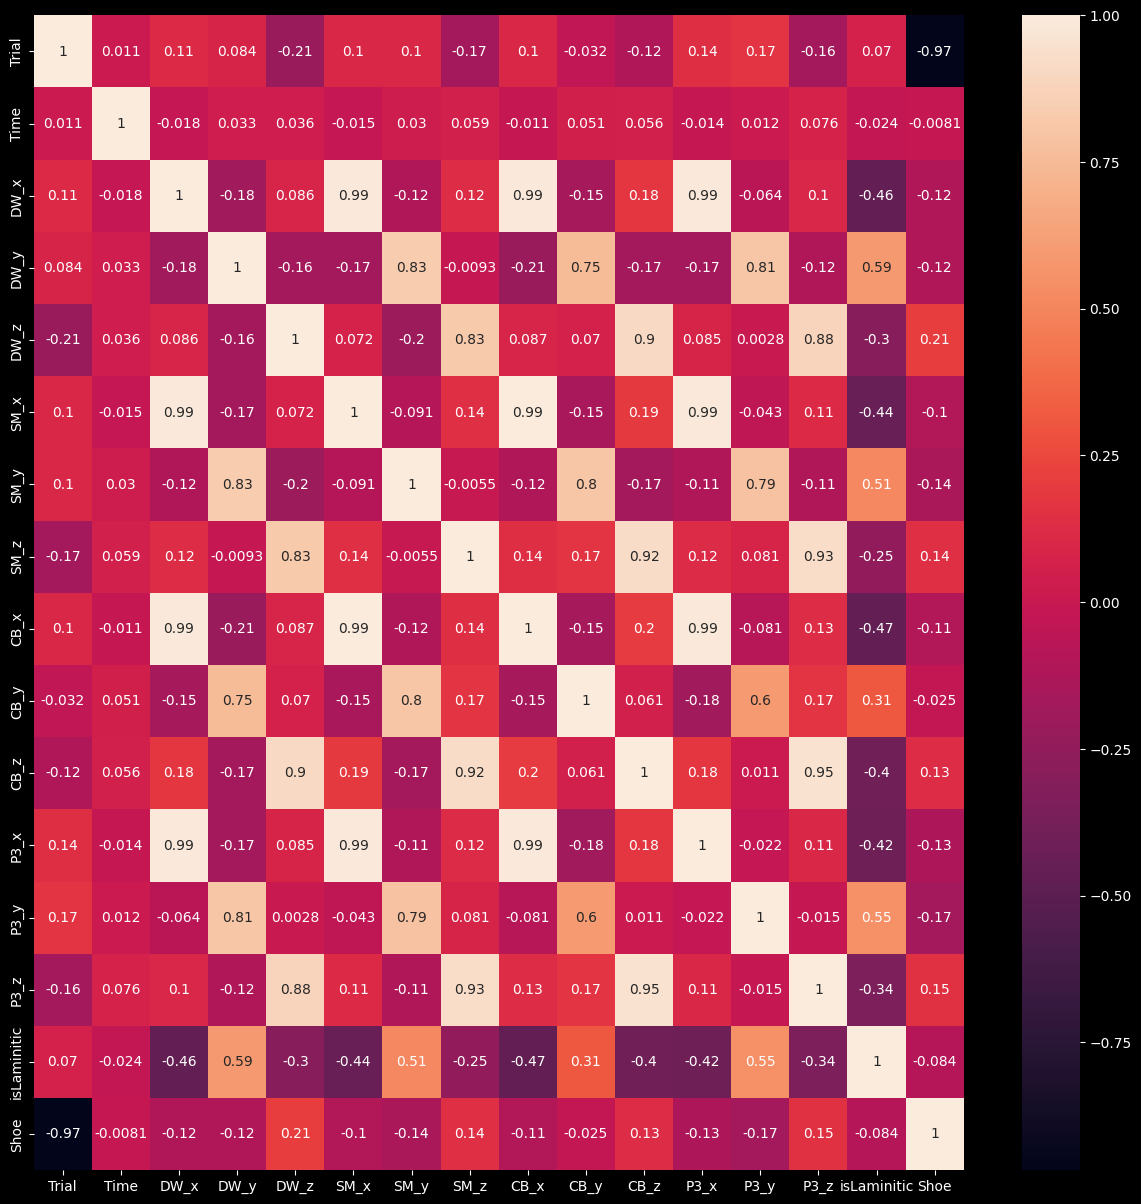

In [17]:
import seaborn as sns

# Pearson Correlation Coefficients

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, ax = ax)
plt.show()

## 3. Fix Coordinates to Start at Zero

In [18]:
df = translate_data(df)

### Plotting Coordinates

Plot of trial 1 coordinates :


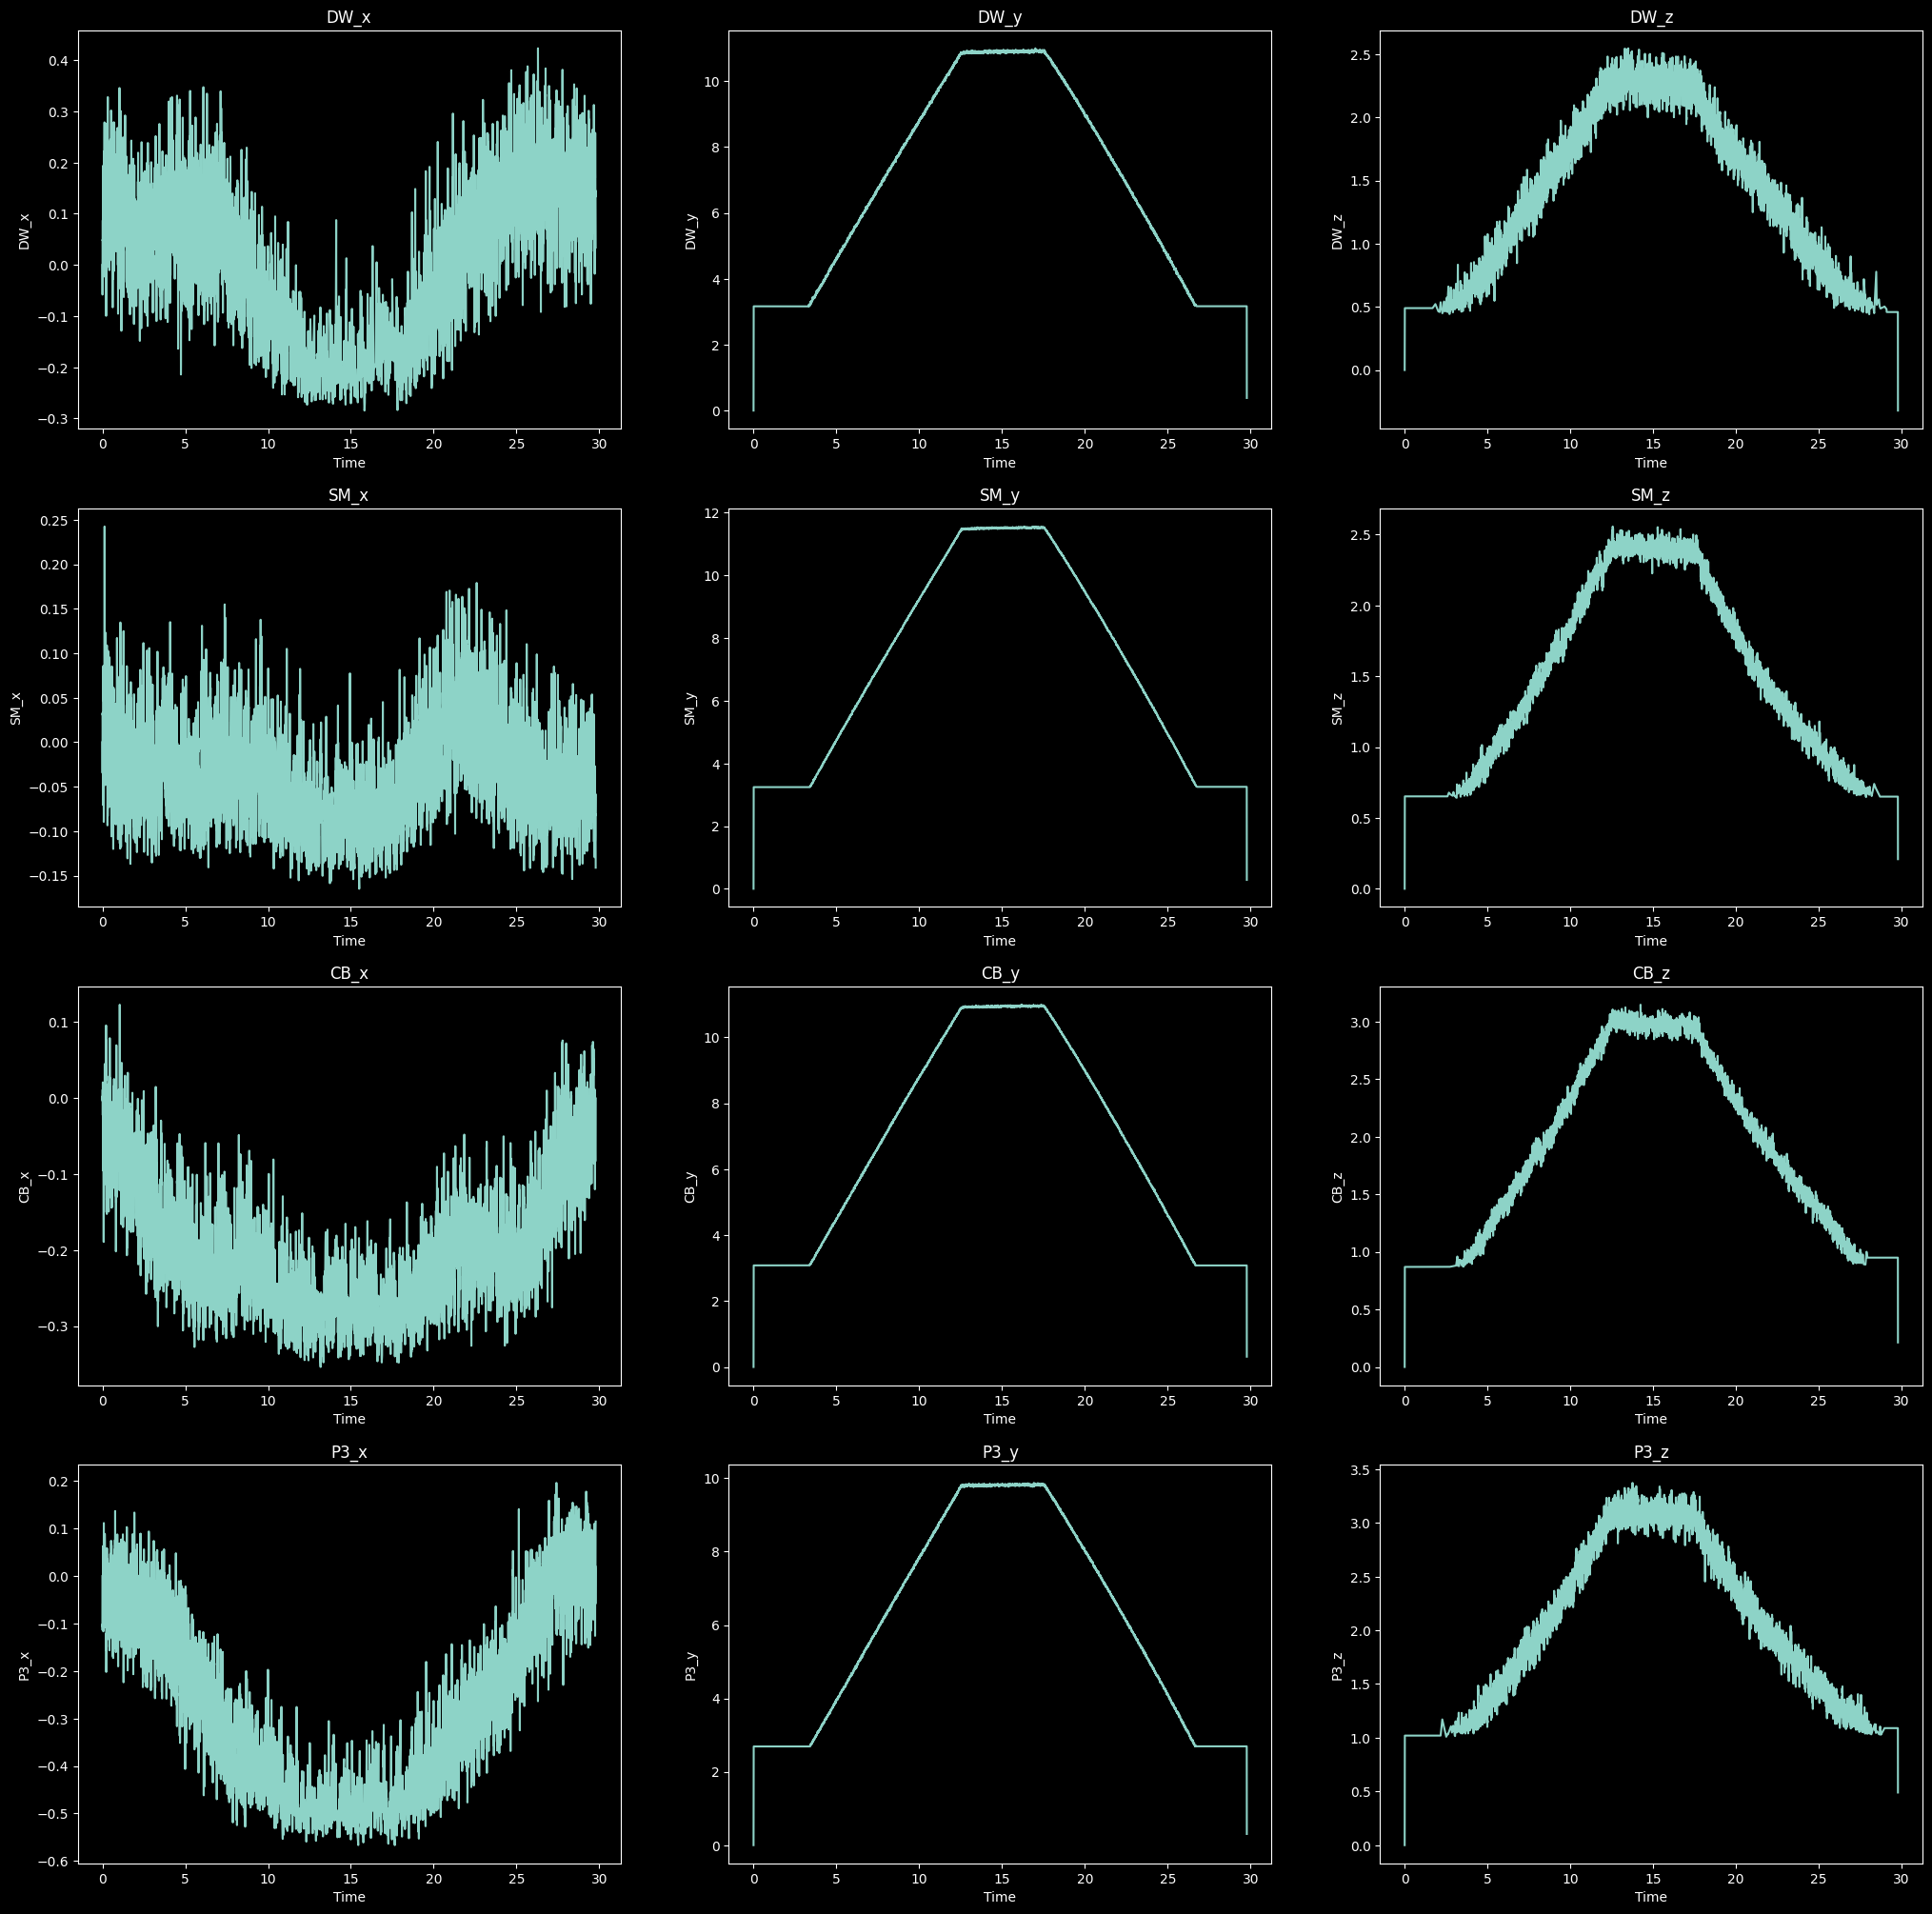

In [19]:
# Per Trial
plot_coords(1, df) # trial, df

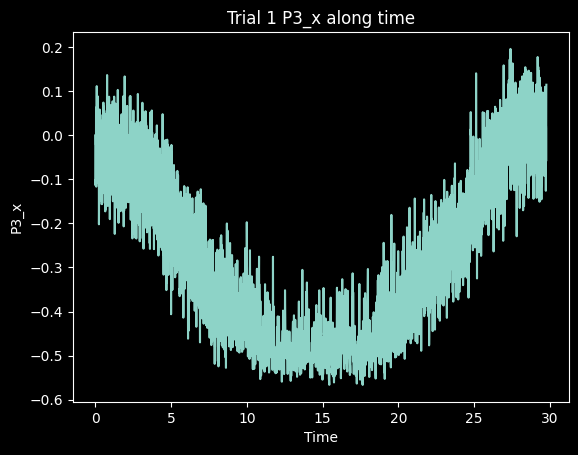

In [20]:
# Per Trial and Coordinate

plot_coord(1, 'P3_x', df) # trial, Coordinate, df

## 4. Fix Lengths For All Trials

In [21]:
print_trial_lengths(df)

{1: 5957, 2: 5673, 3: 6085, 4: 6153, 5: 5795, 6: 6093, 7: 4337, 8: 4543, 9: 4677, 10: 4792, 11: 4497, 12: 4443, 13: 4795, 14: 4625, 15: 4331, 16: 4119, 17: 3625, 18: 3869, 19: 3867, 20: 3995, 21: 4163, 22: 4423, 23: 4457, 24: 4609, 25: 4593, 26: 4201, 27: 4201, 28: 4527, 29: 4001, 30: 4201, 31: 4009, 32: 3911, 33: 4121, 34: 3701, 35: 4003, 36: 4847, 37: 4913, 38: 4989, 39: 4541, 40: 4981, 41: 6001, 42: 5825, 43: 5661, 44: 5531, 45: 5285, 46: 5601, 47: 5601, 48: 5161, 49: 5359, 50: 5251, 51: 4985, 52: 5103, 53: 5055, 54: 5033, 55: 5085, 56: 4863, 57: 4215, 58: 4305, 59: 4185, 60: 4297, 61: 4570, 62: 4435, 63: 4275, 64: 4445, 65: 4341, 66: 4655, 67: 4805, 68: 4601, 69: 4663, 70: 4719, 71: 4677, 72: 4993, 73: 4453, 74: 4855, 75: 4909, 76: 5121, 77: 4983, 78: 5027, 79: 5445, 80: 5105, 81: 3939, 82: 3757, 83: 3919, 84: 4163, 85: 5867, 86: 5996, 87: 5763, 88: 5996, 89: 5449, 90: 4011, 91: 3837, 92: 4115, 93: 3523, 94: 3723, 95: 4305, 96: 4443, 97: 4201, 98: 4201, 99: 4201, 100: 4001, 101: 41

In [22]:
equal_df = equalize_trial_lengths(df)

In [23]:
print_trial_lengths(equal_df)

{1: 3523, 2: 3523, 3: 3523, 4: 3523, 5: 3523, 6: 3523, 7: 3523, 8: 3523, 9: 3523, 10: 3523, 11: 3523, 12: 3523, 13: 3523, 14: 3523, 15: 3523, 16: 3523, 17: 3523, 18: 3523, 19: 3523, 20: 3523, 21: 3523, 22: 3523, 23: 3523, 24: 3523, 25: 3523, 26: 3523, 27: 3523, 28: 3523, 29: 3523, 30: 3523, 31: 3523, 32: 3523, 33: 3523, 34: 3523, 35: 3523, 36: 3523, 37: 3523, 38: 3523, 39: 3523, 40: 3523, 41: 3523, 42: 3523, 43: 3523, 44: 3523, 45: 3523, 46: 3523, 47: 3523, 48: 3523, 49: 3523, 50: 3523, 51: 3523, 52: 3523, 53: 3523, 54: 3523, 55: 3523, 56: 3523, 57: 3523, 58: 3523, 59: 3523, 60: 3523, 61: 3523, 62: 3523, 63: 3523, 64: 3523, 65: 3523, 66: 3523, 67: 3523, 68: 3523, 69: 3523, 70: 3523, 71: 3523, 72: 3523, 73: 3523, 74: 3523, 75: 3523, 76: 3523, 77: 3523, 78: 3523, 79: 3523, 80: 3523, 81: 3523, 82: 3523, 83: 3523, 84: 3523, 85: 3523, 86: 3523, 87: 3523, 88: 3523, 89: 3523, 90: 3523, 91: 3523, 92: 3523, 93: 3523, 94: 3523, 95: 3523, 96: 3523, 97: 3523, 98: 3523, 99: 3523, 100: 3523, 101: 35

## 5. Train/Test Split

In [24]:
X_layer_train, X_layer_test, Y_layer_train, Y_layer_test, Z_layer_train, Z_layer_test, y_train, y_test = train_test_split_layers(equal_df, train_size = 0.7)

## 6. Build & Compile the Model

In [25]:
model = build_model()

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse', 'acc'])

history = model.fit([X_layer_train, Y_layer_train, Z_layer_train], y_train, epochs = 30, batch_size = 32, validation_split = 0.2, use_multiprocessing = True)

Epoch 1/30
12595/12595 [==============================] - 9s 705us/step - loss: 0.0401 - mae: 0.1148 - mse: 0.0401 - acc: 0.9936 - val_loss: 0.3337 - val_mae: 0.3287 - val_mse: 0.3337 - val_acc: 0.9791
Epoch 2/30
12595/12595 [==============================] - 8s 663us/step - loss: 0.0121 - mae: 0.0794 - mse: 0.0121 - acc: 0.9954 - val_loss: 0.3222 - val_mae: 0.3284 - val_mse: 0.3222 - val_acc: 0.9814
Epoch 3/30
12595/12595 [==============================] - 8s 659us/step - loss: 0.0093 - mae: 0.0694 - mse: 0.0093 - acc: 0.9960 - val_loss: 0.3072 - val_mae: 0.3273 - val_mse: 0.3072 - val_acc: 0.9822
Epoch 4/30
12595/12595 [==============================] - 8s 659us/step - loss: 0.0079 - mae: 0.0640 - mse: 0.0079 - acc: 0.9963 - val_loss: 0.2552 - val_mae: 0.2966 - val_mse: 0.2552 - val_acc: 0.9816
Epoch 5/30
12595/12595 [==============================] - 8s 668us/step - loss: 0.0072 - mae: 0.0606 - mse: 0.0072 - acc: 0.9965 - val_loss: 0.2648 - val_mae: 0.3000 - val_mse: 0.2648 - val_ac

## 7. Evaluating the Model

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict([X_layer_test, Y_layer_test, Z_layer_test])

print(f'RMSE = {mean_squared_error(y_test, y_pred, squared = False)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'R² = {r2_score(y_test, y_pred)}')

6716/6716 [==============================] - 2s 344us/step
RMSE = 0.3621616038546679
MSE = 0.15763666397904663
MAE = 0.26600339754549535
R² = 0.39230295489847344


---

## (Optional) Save Model

In [14]:
model.save('model.h5')

---

## Load Model From Disk

In [4]:
model = tf.keras.models.load_model('model.h5')

## Model Architecture

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_input (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 Y_input (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 Z_input (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 shared_dense_layer (Dense)     (None, 64)           320         ['X_input[0][0]',                
                                                                  'Y_input[0][0]',            

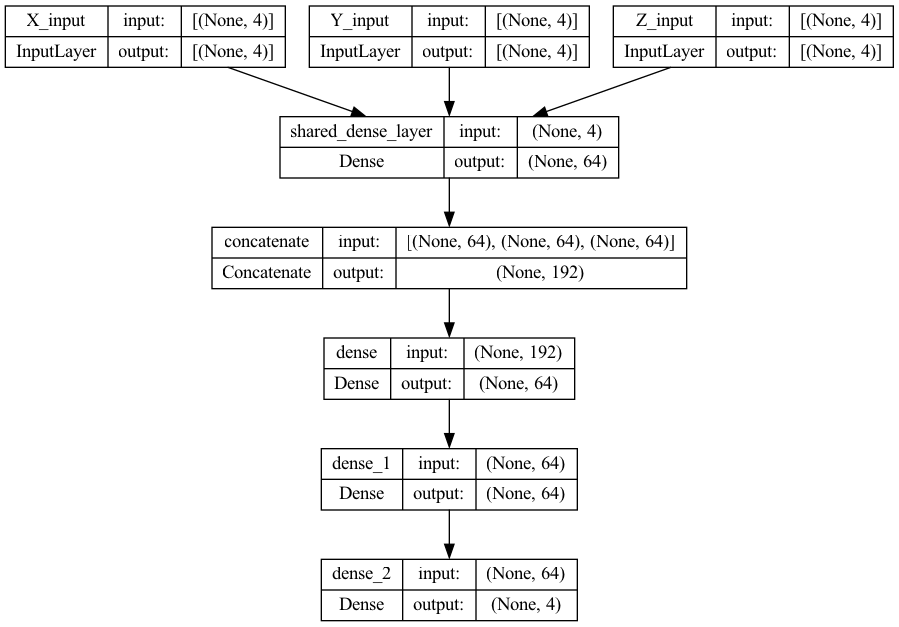

In [30]:
from keras.utils import plot_model 

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', dpi=96)

## Performance per Epochs

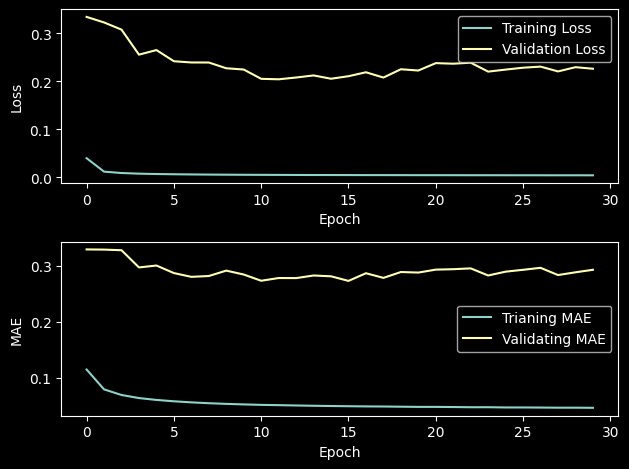

In [27]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim(top = 0, bottom = 0)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['mae'], label = 'Trianing MAE')
plt.plot(history.history['val_mae'], label = 'Validating MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
#plt.ylim(top = 15, bottom = 0)
plt.legend()

plt.tight_layout()
plt.show()


## Visualizing Accuracy of Model

Plotting true coordinates vs predicted coordinates


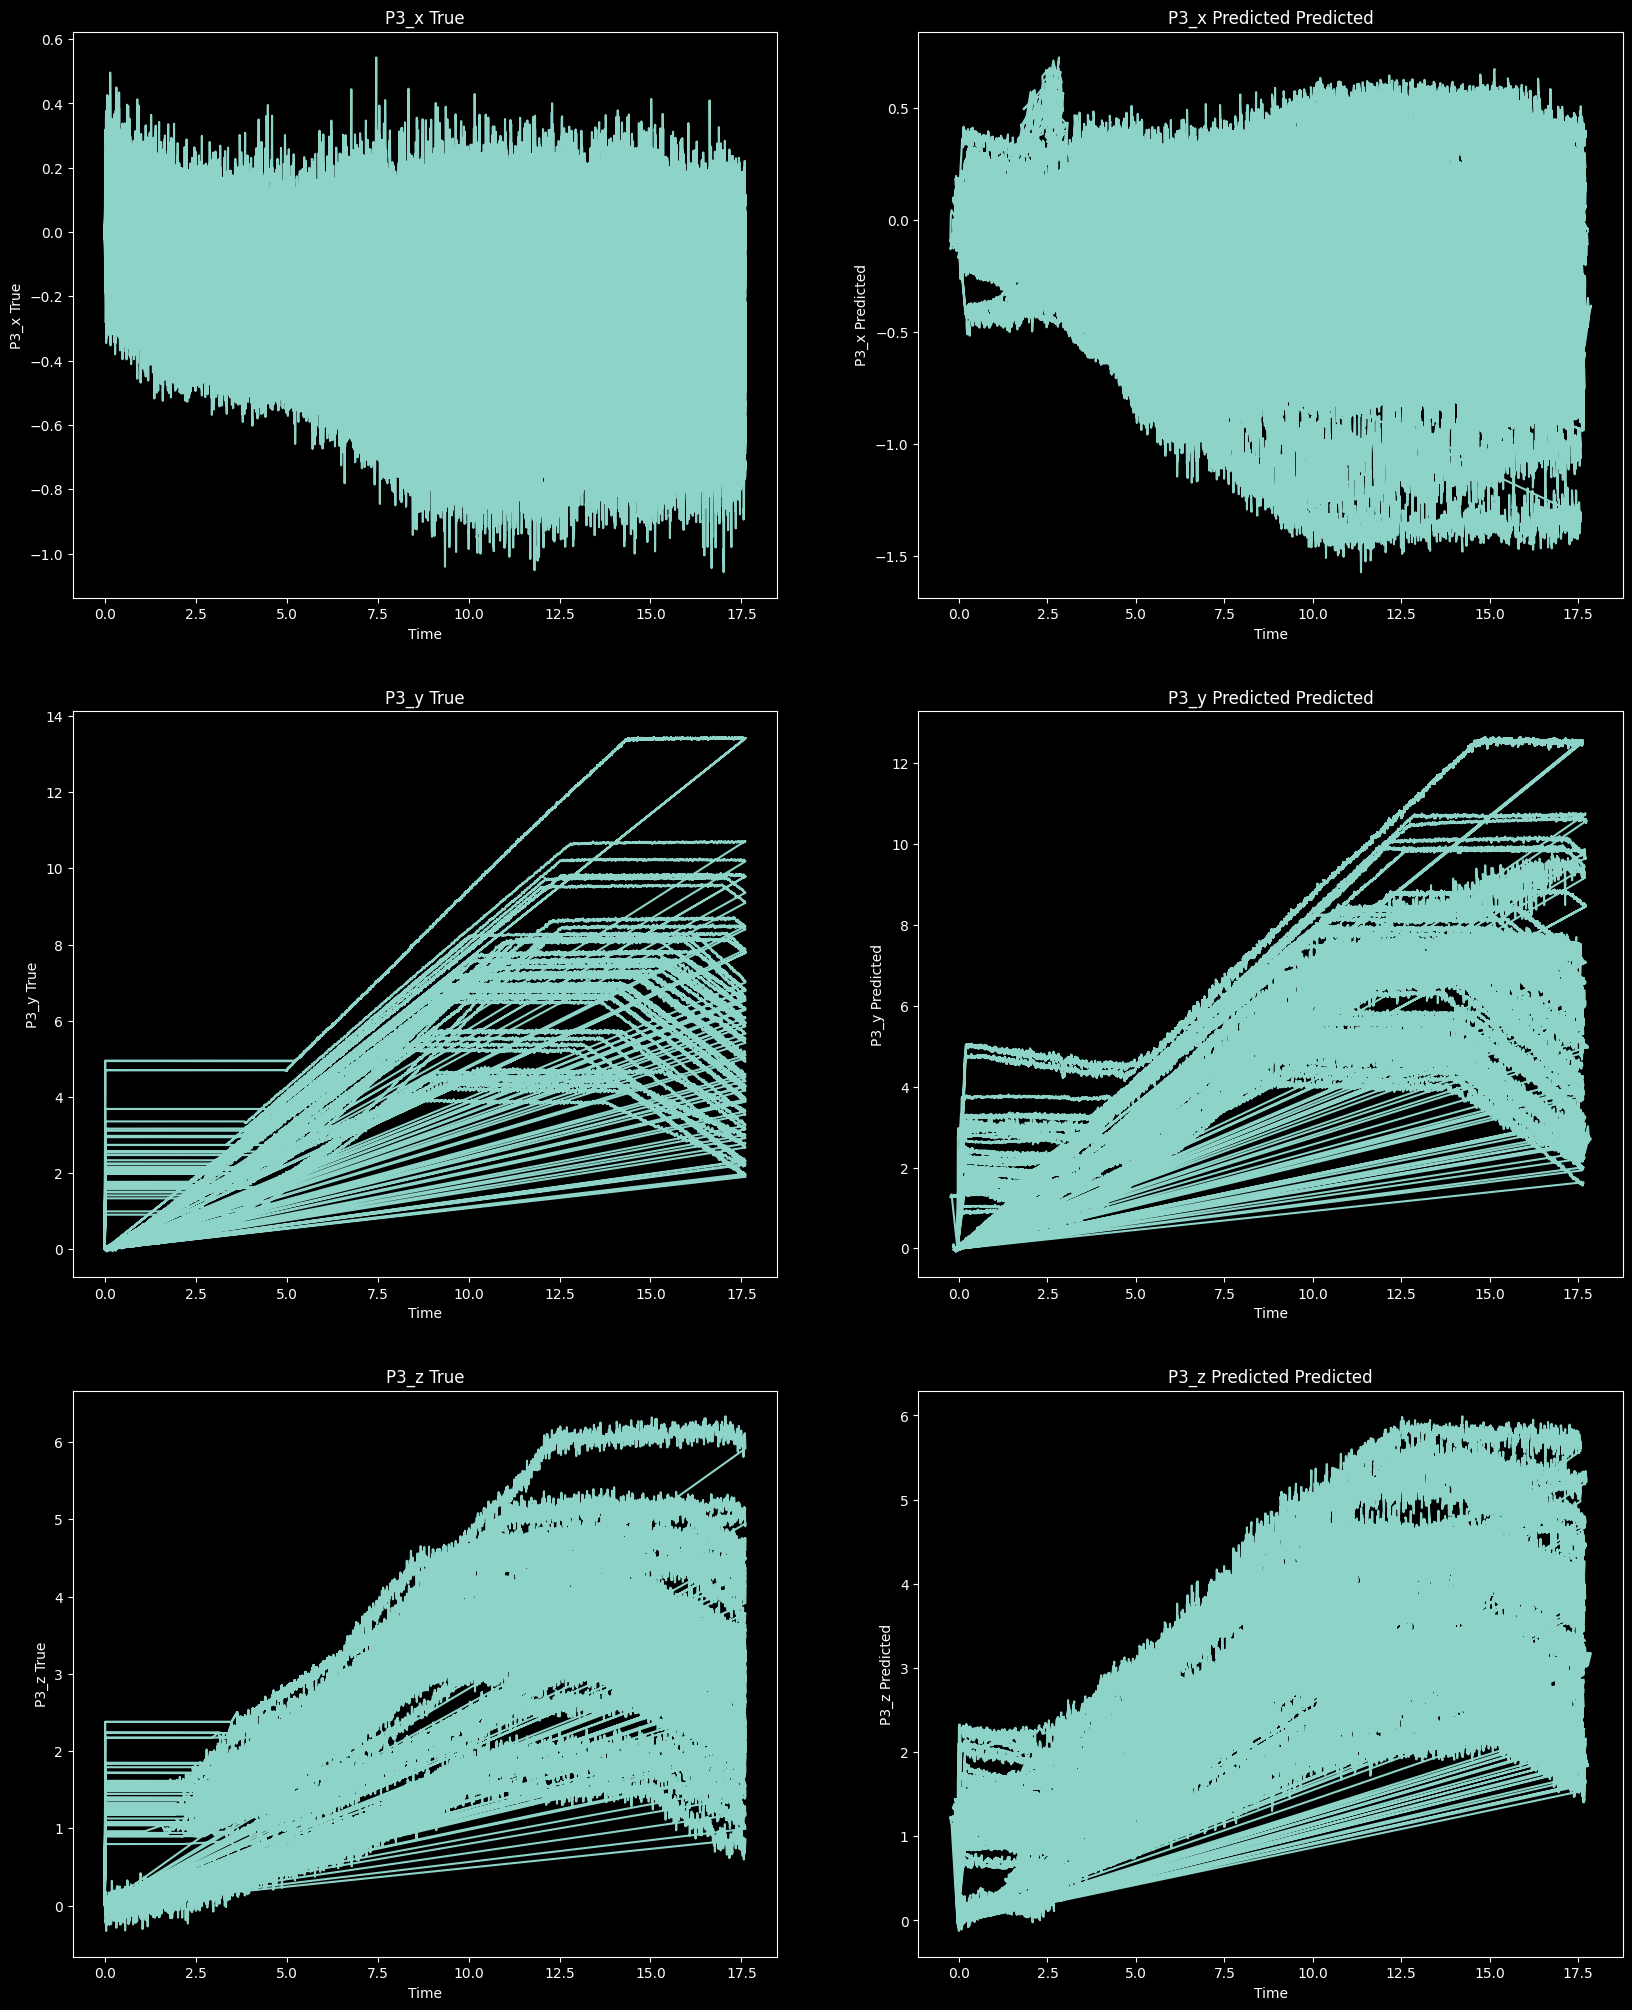

In [28]:
plot_results(y_test, y_pred)